In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def kernel_function(r, sigma=1.0):
    """Example Kernel function that will be evaluated."""
    return np.exp(-1 * np.sqrt(r**2) / sigma)

def check_separability(kernel, window_size: int = 5, normalize: bool = True):
    """Checks if the given kernel function f(r) in 2D is separable into horizontal and vertical components."""

    assert window_size % 2 == 1, "Window size must be odd for symmetry."

    half_window = window_size // 2

    target_kernel = np.zeros((window_size, window_size))
    # Evaluate the kernel function at points in a grid
    for i, x in enumerate(range(-half_window, half_window + 1)):
        for j, y in enumerate(range(-half_window, half_window + 1)):
            r = np.sqrt(x**2 + y**2)
            value = kernel(r)
            target_kernel[i, j] = value

    horizontal_kernel = np.zeros((1, window_size))
    for i, x in enumerate(range(-half_window, half_window + 1)):
        value = kernel(x)
        horizontal_kernel[0, i] = value

    vertical_kernel = np.zeros((window_size, 1))
    for j, y in enumerate(range(-half_window, half_window + 1)):
        value = kernel(y)
        vertical_kernel[j, 0] = value

    result_kernel = vertical_kernel @ horizontal_kernel

    if normalize:
        result_kernel /= np.sum(result_kernel)
        target_kernel /= np.sum(target_kernel)

    error = np.linalg.norm(target_kernel - result_kernel)
    separable = error < 0.001 * np.sum(np.abs(target_kernel))

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    axs[0].imshow(target_kernel, cmap='viridis')
    axs[0].set_title('Target Kernel')
    axs[0].axis('off')

    axs[1].imshow(horizontal_kernel, cmap='viridis', aspect='auto')
    axs[1].set_title('Horizontal Kernel')
    axs[1].axis('off')

    axs[2].imshow(vertical_kernel, cmap='viridis', aspect='auto')
    axs[2].set_title('Vertical Kernel')
    axs[2].axis('off')

    axs[3].imshow(result_kernel, cmap='viridis')
    axs[3].set_title('Net Kernel')
    axs[3].axis('off')

    for ax, kernel, title in zip(
        axs,
        [target_kernel, horizontal_kernel, vertical_kernel, result_kernel],
        ['Target Kernel', 'Horizontal Kernel', 'Vertical Kernel', 'Net Kernel']
    ):
        for (i, j), val in np.ndenumerate(kernel):
            ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='white', fontsize=8)

    plt.suptitle(f'Kernel is separable: {separable} | Error: {error}')
    plt.show()

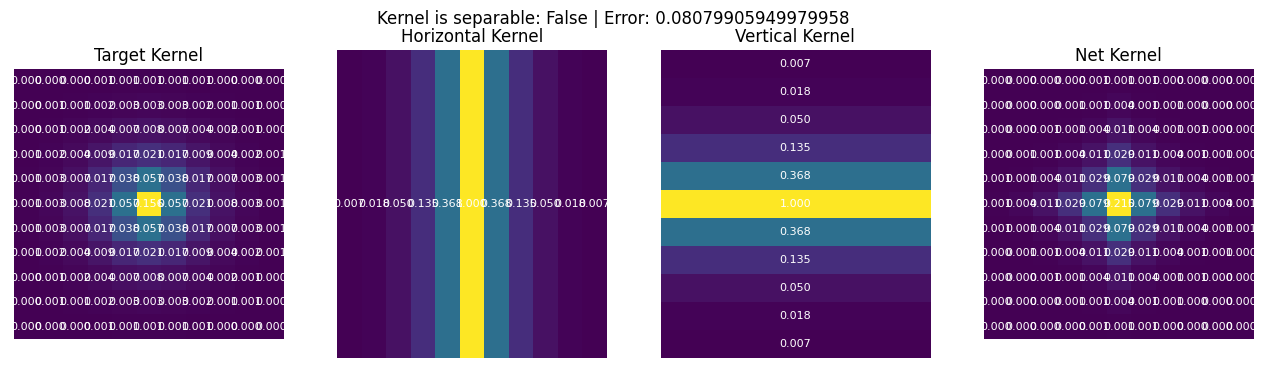

In [13]:
check_separability(kernel_function, 11, True)